In [1]:
# import numpy as np
# import matplotlib.pylab as plt

# 벡터/행렬의 덧셈과 뺄셈

In [2]:
# 벡터의 덧셈과 뺄셈

x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

print(f"x + y: {x + y} \nx - y: {x - y}")

x + y: [10 12 14 16 18] 
x - y: [10 10 10 10 10]


In [3]:
# 행렬의 덧셈과 뺄셈

np.array([[5, 6], [7, 8]]) + np.array([[10, 20], [30, 40]]) - np.array([[1, 2], [3, 4]])

array([[14, 24],
       [34, 44]])

In [4]:
# 브로드캐스팅(Broadcasting): 스칼라 값을 벡터나 행렬과의 연산에 쓰이게 할 수 있는 기능

np.array([10, 11, 12]) - 10 
# = np.array([10, 11, 12]) - np.array([10, 10, 10])

array([0, 1, 2])

In [5]:
# 벡터 내적: 벡터의 곱

# 두 벡터의 차원(길이)이 같아야 하고
# 앞의 벡터가 행 벡터이고 뒤의 벡터가 열 벡터여야 함

x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])

x.T @ y  # 또는 np.dot(x.T, y)
# 1*4 + 2*5 + 3*6 = 32

# numpy에서는 1차원 배열끼리도 내적 가능
# 가중합(Weighted Sum)을 구할 때

array([[32]])

In [6]:
# 연습 문제 2.2.1

# A, B, C 세 회사의 주식은 각각 100만원, 80만원, 50만원이다. 이 주식을 각각 3주, 4주, 5주를 매수할 때 필요한 금액을 구하고자 한다.

p = np.array([100, 80, 50])
n = np.array([3, 4, 5])

p @ n

870

In [7]:
# 가중평균(weighted average): 가중합의 가중치값을 전체 가중치값의 합으로 나눈 값

x = np.arange(10)
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x.mean()

4.5

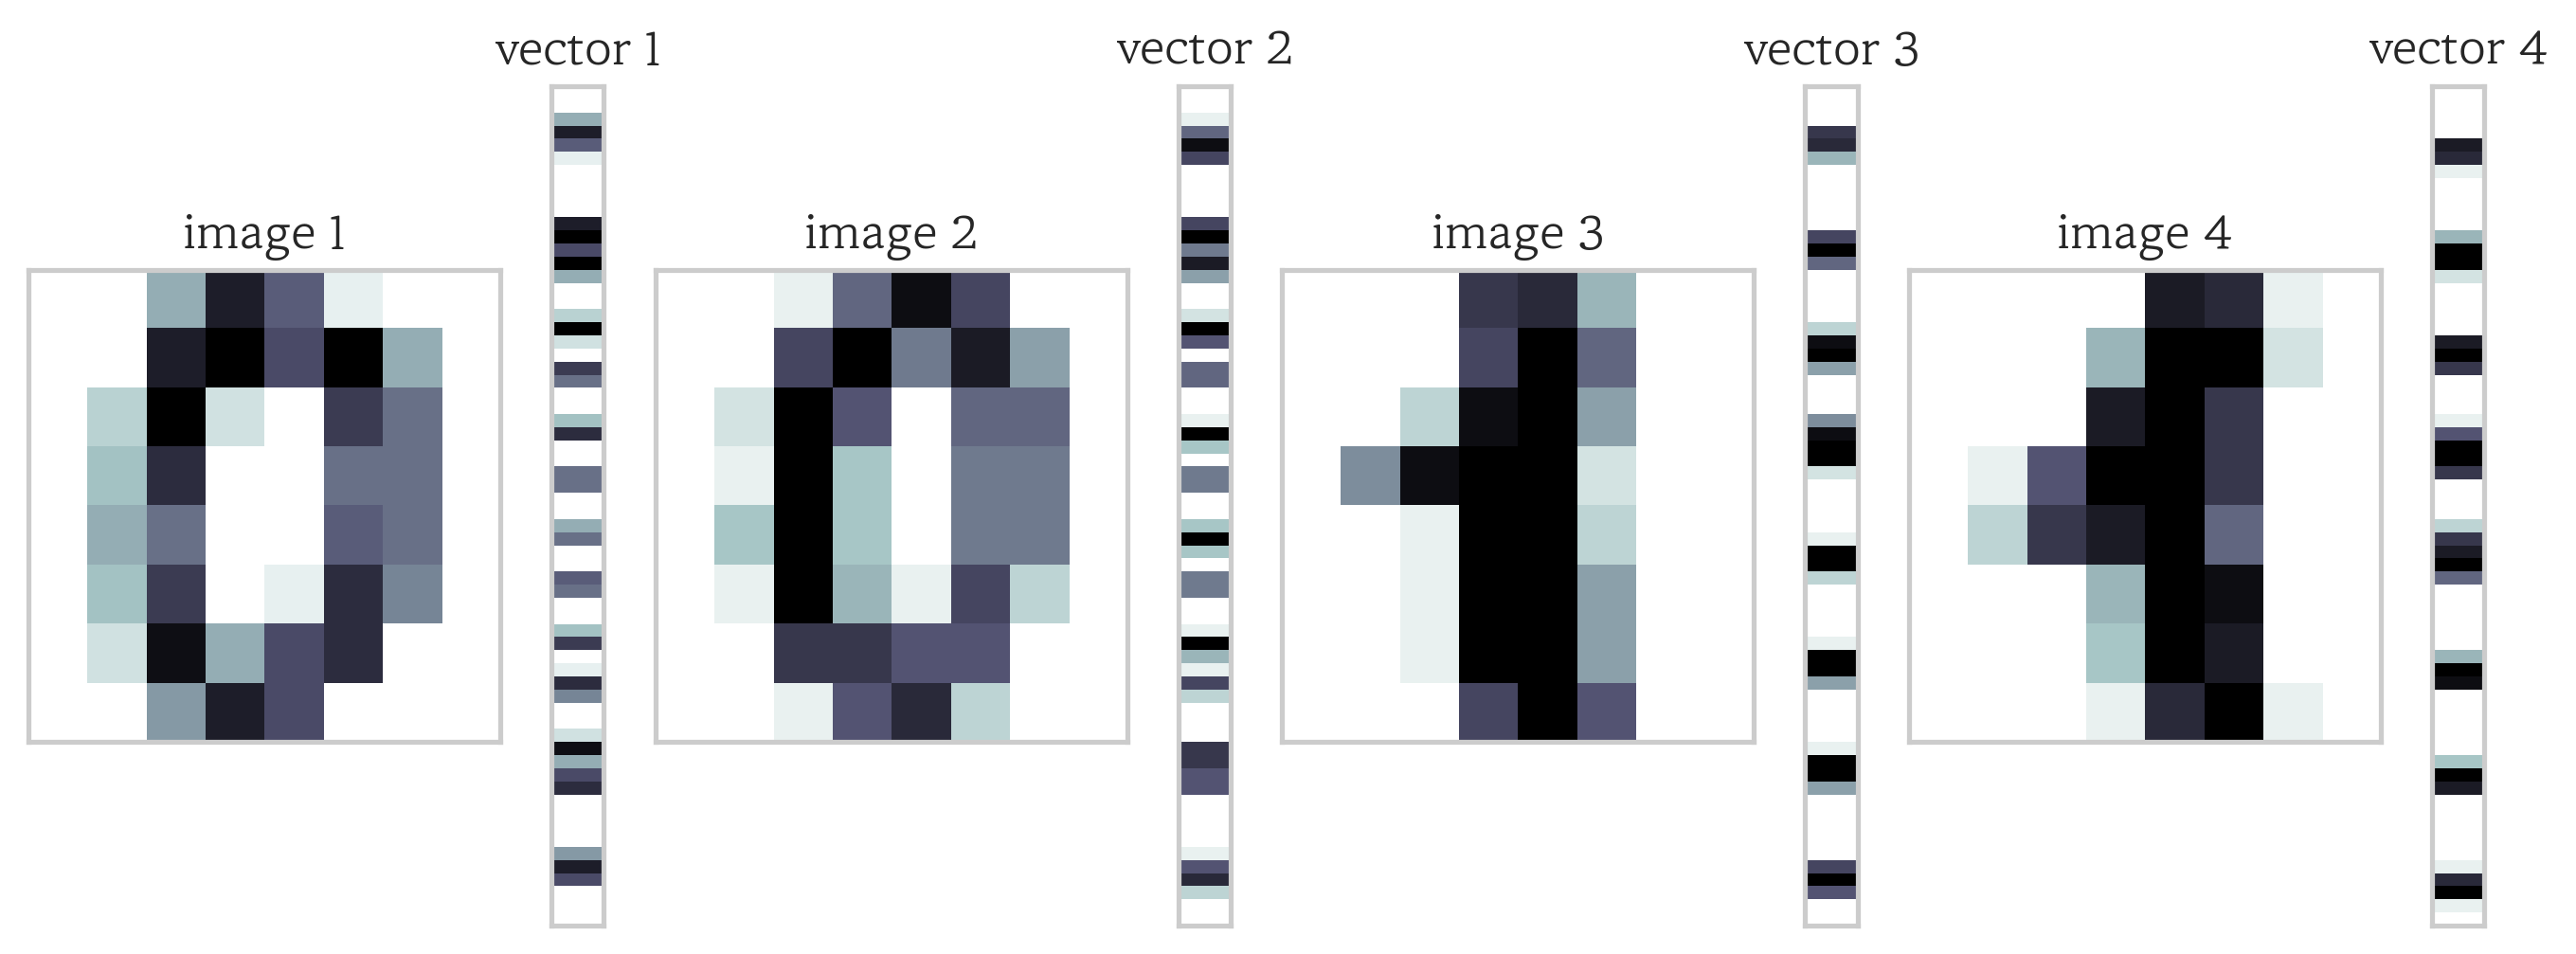

In [8]:
# 유사도(similarity): 두 벡터가 닮은 정도를 정량적으로 나타낸 값

# 0과 1을 나타내는 MNIST 이미지에 대한 내적 구하기

from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [9]:
# "0" 이미지와 "0" 이미지, 또는 "1" 이미지와 "1" 이미지의 내적값

(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [10]:
# "0" 이미지와 "1" 이미지, 또는 "1" 이미지와 "0" 이미지의 내적값

(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

# 상대적으로 작은 값 (작은 코사인 유사도(cosine similarity))

(1866.0, 1883.0, 2421.0, 2479.0)

In [11]:
# 연습 문제 2.2.3

from sklearn.datasets import load_digits
X = load_digits().data # 숫자 이미지 전체 데이터를 모두 벡터로 변환

# (1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.
print(X[0].T @ X[9])

# (2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 어떻게 구현하는 것이 효율적일까?
print((X.T @ X))

2807.0
[[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 1.64400e+03 7.15400e+03 ... 3.40600e+03 1.30600e+03
  6.60000e+01]
 [0.00000e+00 7.15400e+03 8.92850e+04 ... 6.11890e+04 2.18770e+04
  4.72000e+03]
 ...
 [0.00000e+00 3.40600e+03 6.11890e+04 ... 1.44749e+05 5.32400e+04
  9.59500e+03]
 [0.00000e+00 1.30600e+03 2.18770e+04 ... 5.32400e+04 3.77360e+04
  9.83300e+03]
 [0.00000e+00 6.60000e+01 4.72000e+03 ... 9.59500e+03 9.83300e+03
  6.45300e+03]]


In [12]:
# 행렬의 곱

A = np.array([[1, 2, 3], [4, 5, 6]]) # 2 X 3 행렬
B = np.array([[1, 2], [3, 4], [5, 6]]) # 3 X 2 행렬

C = A @ B
C # 2 X 2 행렬

array([[22, 28],
       [49, 64]])

In [13]:
# 행렬의 곱은 교환 법칙 성립하지 않음
# 행렬의 덧셈에 대한 분배 법칙은 성립

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

print(A @ B) # array([[19, 22], [43, 50]])
print(B @ A) # array([[23, 34], [31, 46]])
print(A @ (B + C)) # array([[42, 42], [98, 98]])
print(A @ B + A @ C) # array([[42, 42], [98, 98]])
print((A + B) @ C) # array([[110,  96], [174, 152]])
print(A @ C + B @ C) # array([[110,  96], [174, 152]])

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]
[[42 42]
 [98 98]]
[[42 42]
 [98 98]]
[[110  96]
 [174 152]]
[[110  96]
 [174 152]]


In [18]:
# 전치 연산에도 분배 법칙 성립
# 곱셈의 경우엔 곱셈의 순서가 바뀜

print((A + B).T == A.T + B.T)
print((A @ B).T == B.T @ A.T)

# 연속된 행렬의 곱셈은 계산 순서를 임의의 순서로 해도 상관없음
# ABCD=((AB)C)D=(AB)(CD)=A(BCD)=A(BC)D

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


In [19]:
# 항등 행렬과의 곱은 변하지 않음

A = np.array([[1, 2], [3, 4]])
I = np.eye(2)

A @ I == I @ A

array([[ True,  True],
       [ True,  True]])

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Hongmin\scikit_learn_data


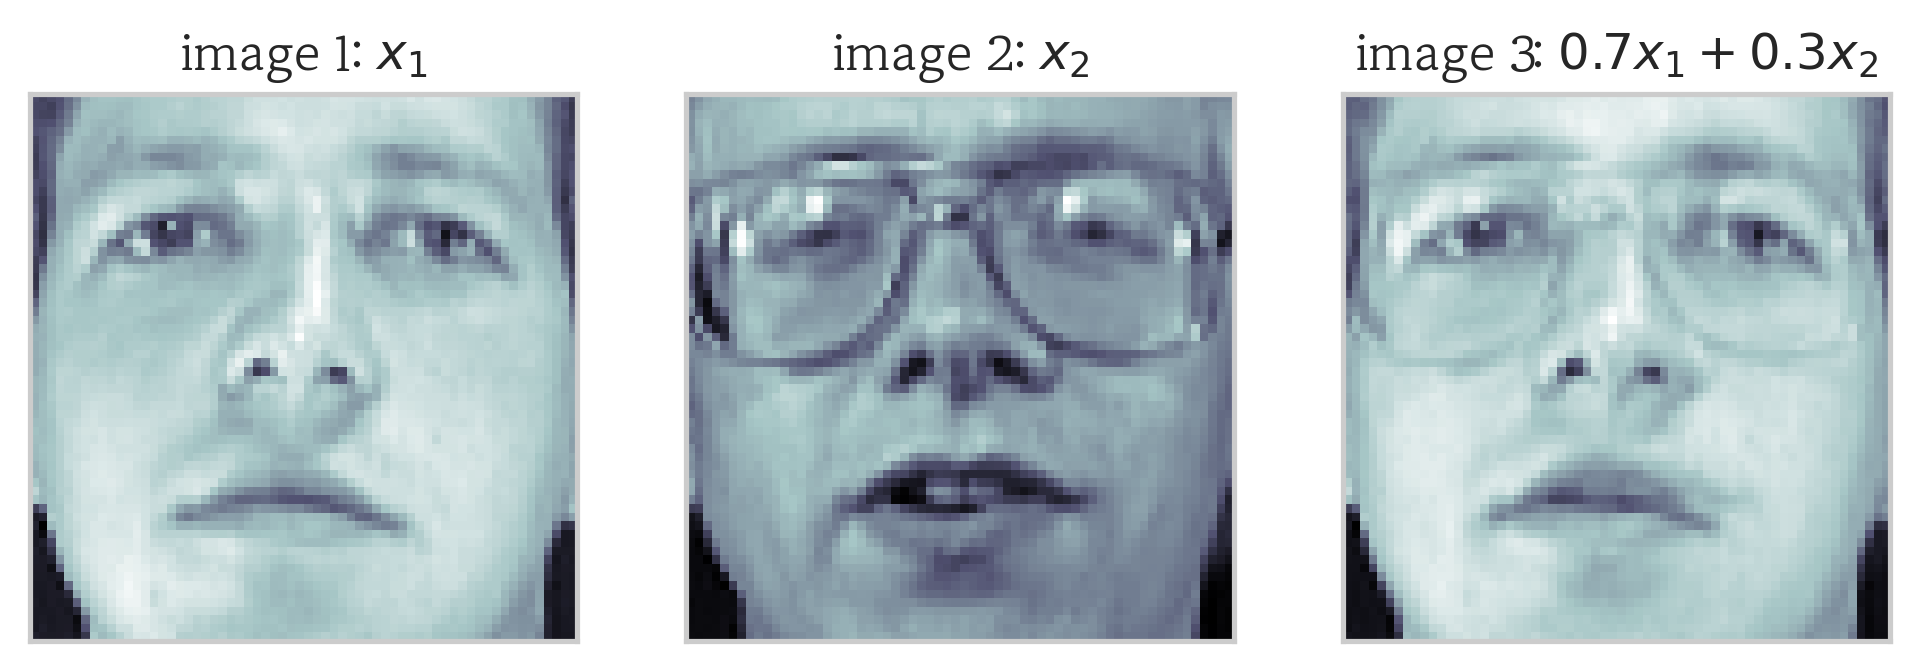

In [20]:
# 벡터의 선형 조합 예

from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

In [ ]:
# 오차(error) 혹은 잔차(residual): 예측치와 실젯값(target)의 차이

# 잔차 제곱합(RSS: Residual Sum of Squares)을 통해 잔차의 크기를 구함

# 이차형식(Quadratic Form): 어떤 벡터와 정방행렬이 '행벡터 × 정방행렬 × 열벡터'의 형식